# Input - Output

The most crucial aspect of any program is its input and output. We can read data from various sources and in different ways, but the fundamental concept that underlies all of them is the concept of a file.

## Basics

Files and folders (directories) in a typical file system are organized in a tree-like structure. The root of this tree in Unix-based systems is represented by:

`/`

In Windows-related systems, there is no single root, but each partition starts with a designated letter, such as:

`C:\`

Another important difference is the use of `/` in Unix systems and `\` in Windows systems. A typical Linux path looks like this:

`/content/gdrive/MyDrive/python_tutorial/data`

It specifies the location of a folder, file, or program within the file system. By using Python language tools, we can examine what we're dealing with.

In [1]:
import os

data_diretory_path= "data"

print(os.path.isdir(data_diretory_path))
print(os.path.isfile(data_diretory_path))

True
False


When we want to check the contents of a directory from Python

In [2]:
files= os.listdir(data_diretory_path)
print(files)

['power_sources.csv', 'HST.fits', 'M13_blue_0002.fits', 'artists_figure.png', 'GaiaDR2.csv', 'star_list.txt', '.DS_Store', 'M13_blue_0003.fits', 'M13_blue_0004.fits', 'pandas_data', 'second_file.dat', 'M13_blue_0005.fits', 'scipy_data', 'artists_tree.png', 'copy_of_example_spectrum.txt', 'nip.fits', 'hd145482.dat', 'some_usefull_file.dat', 'NGC6823_UDF_I.fits', 'example_spectrum.dsv', 'M13_blue_0001.fits', 'example_file.dat']


## Files

Let's start with creating a file

In [31]:
file_name= "example_file.dat"
file_path= os.path.join(data_diretory_path, file_name)
f = open(file_path,'w')

f.write("Mám rád hvězdy") # Write to file

f.close() # File must be closed

In [32]:
help(open)

Help on function open in module io:

open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
    Open file and return a stream.  Raise OSError upon failure.
    
    file is either a text or byte string giving the name (and the path
    if the file isn't in the current working directory) of the file to
    be opened or an integer file descriptor of the file to be
    wrapped. (If a file descriptor is given, it is closed when the
    returned I/O object is closed, unless closefd is set to False.)
    
    mode is an optional string that specifies the mode in which the file
    is opened. It defaults to 'r' which means open for reading in text
    mode.  Other common values are 'w' for writing (truncating the file if
    it already exists), 'x' for creating and writing to a new file, and
    'a' for appending (which on some Unix systems, means that all writes
    append to the end of the file regardless of the current seek position).
    In

Now let's try to read the file back.

In [33]:
f = open(file_path,'r')

file_content= f.read() # Read from file

f.close()

In [34]:
print(file_content)

Mám rád hvězdy


#### Recommended syntax

In [8]:
file_name= "second_file.dat"
file_path= os.path.join(data_diretory_path, file_name)
with open(file_path,'w') as f:
    f.write("example text!")

In [9]:
with open(file_path) as f: # 'r' - is default
    file_content= f.read()
print(file_content)

example text!


## Real case of using a file

In [13]:
import numpy as np

x= np.arange(0,10,0.01)
y= np.sin(x)
N = len(x)

In [14]:
N

1000

Creating file

In [15]:
file_name= "some_usefull_file.dat"
file_path= os.path.join(data_diretory_path,file_name)

with open(file_path,'w') as f:
    for i in range(N):
        next_line= str(x[i]) + " " + str(y[i]) + '\n'
        f.write(next_line)

Reading from this file

In [16]:
with open(file_path) as f: # 'r' - is default
    file_content= f.read()
print(file_content)

0.0 0.0
0.01 0.009999833334166664
0.02 0.01999866669333308
0.03 0.02999550020249566
0.04 0.03998933418663416
0.05 0.04997916927067833
0.06 0.059964006479444595
0.07 0.06994284733753277
0.08 0.0799146939691727
0.09 0.08987854919801104
0.1 0.09983341664682815
0.11 0.10977830083717481
0.12 0.11971220728891936
0.13 0.12963414261969486
0.14 0.1395431146442365
0.15 0.14943813247359922
0.16 0.15931820661424598
0.17 0.16918234906699603
0.18 0.17902957342582418
0.19 0.18885889497650057
0.2 0.19866933079506122
0.21 0.20845989984609956
0.22 0.21822962308086932
0.23 0.2279775235351884
0.24 0.23770262642713458
0.25 0.24740395925452294
0.26 0.2570805518921551
0.27 0.26673143668883115
0.28 0.27635564856411376
0.29 0.28595222510483553
0.3 0.29552020666133955
0.31 0.3050586364434435
0.32 0.31456656061611776
0.33 0.32404302839486837
0.34 0.3334870921408144
0.35000000000000003 0.3428978074554514
0.36 0.35227423327508994
0.37 0.361615431964962
0.38 0.3709204694129827
0.39 0.3801884151231614
0.4 0.38941834

In [17]:
line_by_line_content= file_content.splitlines()
line_by_line_content[1]

'0.01 0.009999833334166664'

In [18]:
x_readed, y_readed= [], []
for line in line_by_line_content:
    xx,yy= line.split()
    x_readed.append(float(xx))
    y_readed.append(float(yy))

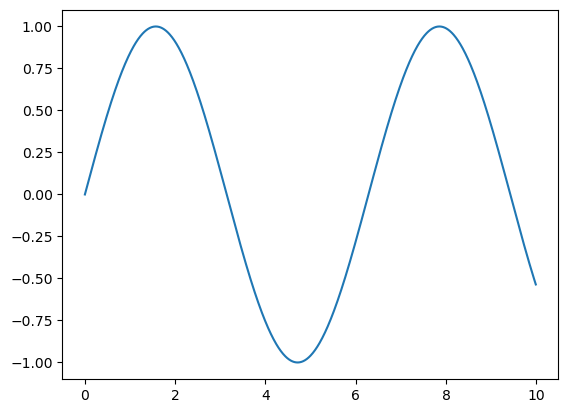

In [19]:
import matplotlib.pyplot as plt

plt.plot(x_readed, y_readed)

## Loading spectrum

In [20]:
def read_two_column_file(file_path):
    x,y=[],[]
    with open(file_path) as f:
        for line in f:
            numbers= line.split()
            if len(numbers) >= 2:
                x.append(float(numbers[0]))
                y.append(float(numbers[1]))
            else:
                x.append(float(numbers[0]))
                y.append(float(0.))
    return x, y

In [21]:
file_name= "example_spectrum.dsv"
file_path= os.path.join(data_diretory_path,file_name)
wave, flux= read_two_column_file(file_path)

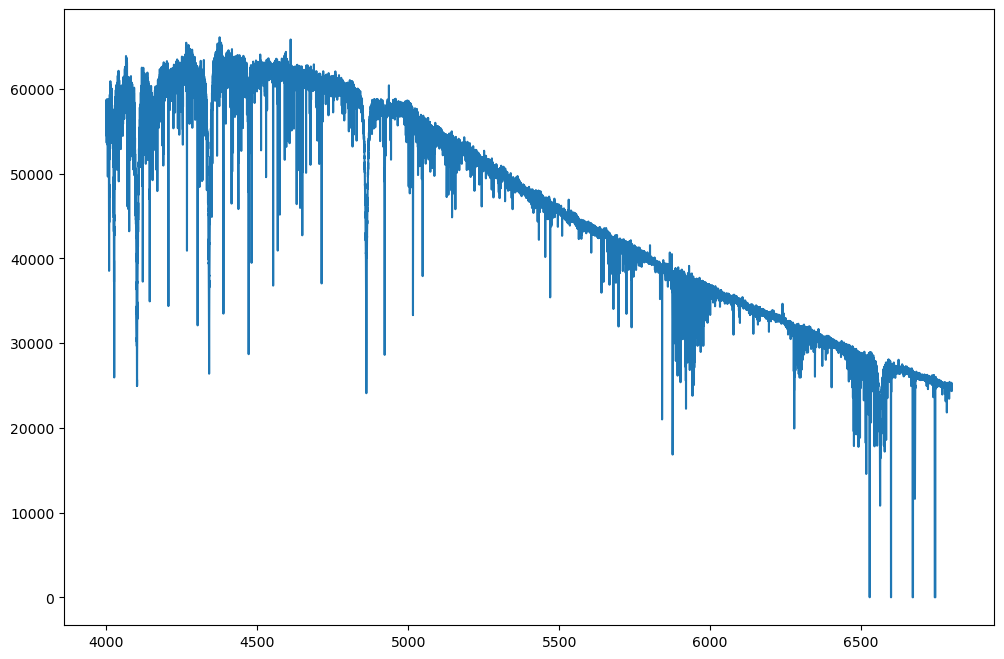

In [22]:
plt.figure(figsize=(12,8))
plt.plot(wave,flux)

In [23]:
def save_to_file(file_path, x, y):
    with open(file_path,'w') as f:
        for xx,yy in zip(x, y):
            f.write("{} {}\n".format(xx,yy))

In [24]:
file_name= "copy_of_example_spectrum.txt"
file_path= os.path.join(data_diretory_path,file_name)
save_to_file(file_path, wave, flux)